# Section 8: Capstone Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercises

In [2]:
fandango_scrape = pd.read_csv('fandango_scrape.csv')

In [3]:
fandango_scrape.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango_scrape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango_scrape.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot: xlabel='RATING', ylabel='VOTES'>

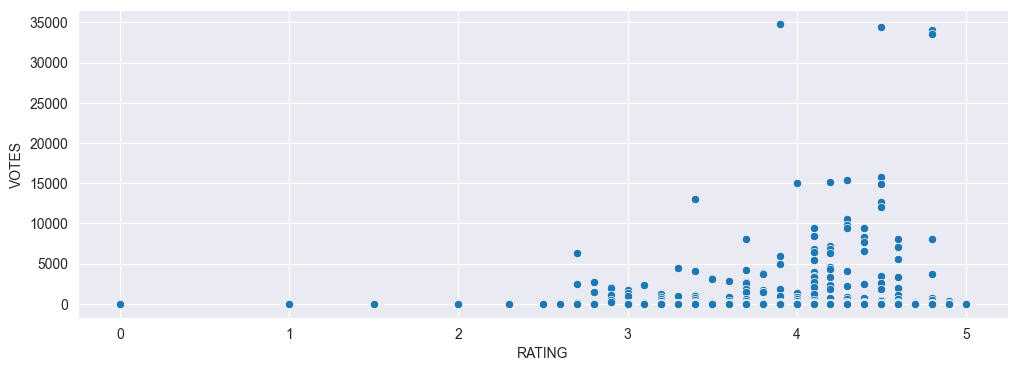

In [6]:
plt.figure(figsize=(12, 4))

sns.scatterplot(fandango_scrape, x='RATING', y='VOTES')

In [7]:
fandango_scrape.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
fandango_scrape['YEAR'] = fandango_scrape['FILM'].str.split().str[-1].str.replace('\(|\)', '', regex=True)
fandango_scrape

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [9]:
fandango_scrape['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot: xlabel='YEAR', ylabel='count'>

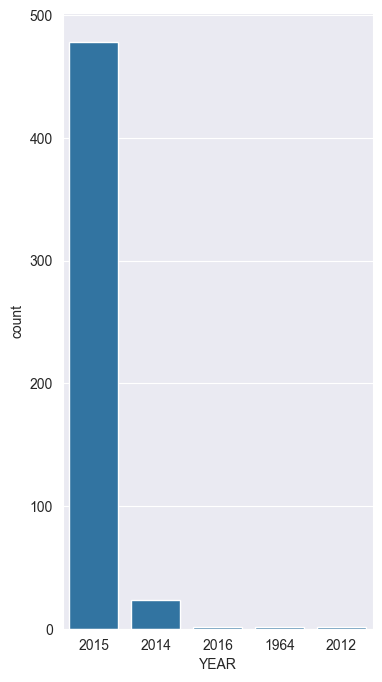

In [10]:
plt.figure(figsize=(4, 8))

sns.countplot(fandango_scrape, x='YEAR')

In [11]:
fandango_scrape.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [12]:
len(fandango_scrape[fandango_scrape['VOTES'] == 0])

69

In [13]:
fandango_scrape_with_votes = fandango_scrape.drop(fandango_scrape[fandango_scrape['VOTES'] == 0].index)

In [14]:
fandango_scrape_with_votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


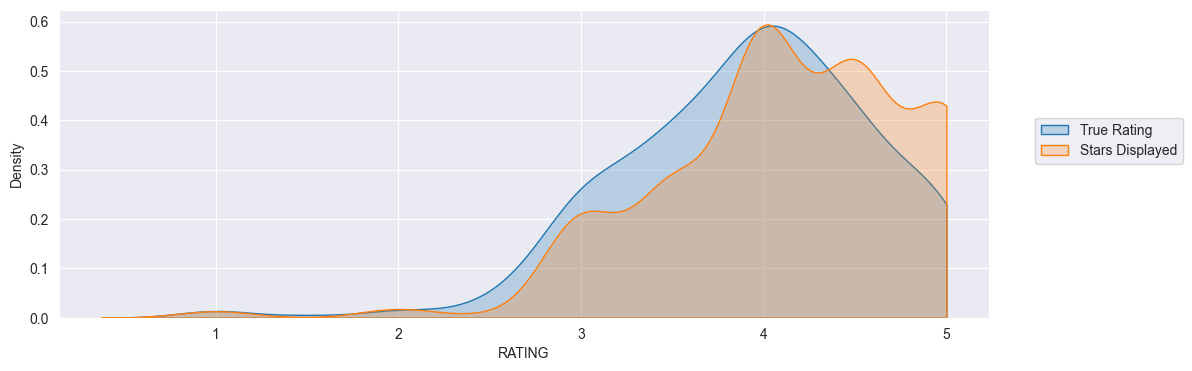

In [15]:
plt.figure(figsize=(12, 4))

sns.kdeplot(fandango_scrape_with_votes, x='RATING', clip=(0, 5), fill=True)
sns.kdeplot(fandango_scrape_with_votes, x='STARS', clip=(0, 5), fill=True)

plt.legend(['True Rating', 'Stars Displayed'], loc=(1.05, 0.5))

In [16]:
fandango_scrape_with_votes['STARS_DIFF'] = np.round(fandango_scrape_with_votes['STARS'] - fandango_scrape_with_votes['RATING'], 1)
fandango_scrape_with_votes

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot: xlabel='STARS_DIFF', ylabel='count'>

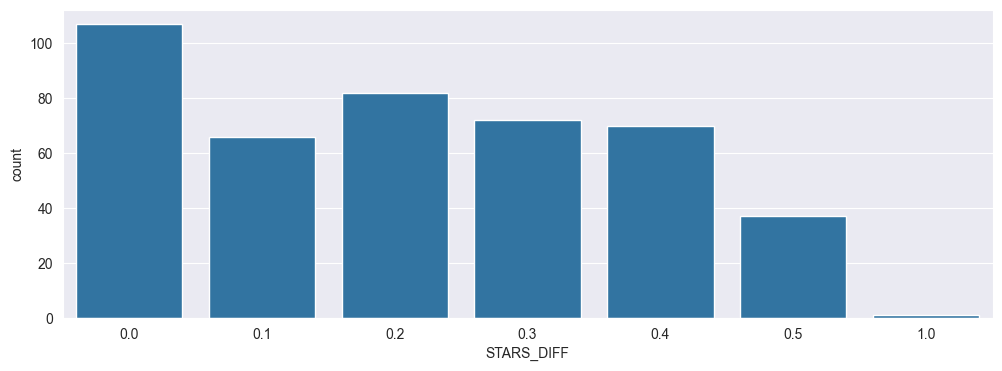

In [17]:
plt.figure(figsize=(12, 4))

sns.countplot(fandango_scrape_with_votes, x='STARS_DIFF')

In [18]:
fandango_scrape_with_votes[fandango_scrape_with_votes['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [19]:
all_site_scores = pd.read_csv('all_sites_scores.csv')

In [20]:
all_site_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_site_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
all_site_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<AxesSubplot: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

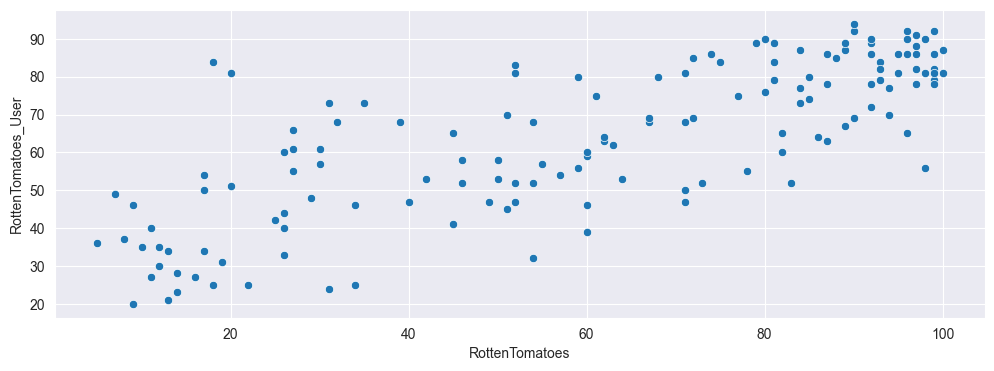

In [23]:
plt.figure(figsize=(12, 4))

sns.scatterplot(all_site_scores, x='RottenTomatoes', y='RottenTomatoes_User')

In [24]:
all_site_scores['Rotten_Diff'] = all_site_scores['RottenTomatoes'] - all_site_scores['RottenTomatoes_User']
all_site_scores['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

In [25]:
all_site_scores['Rotten_Diff'].abs().mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

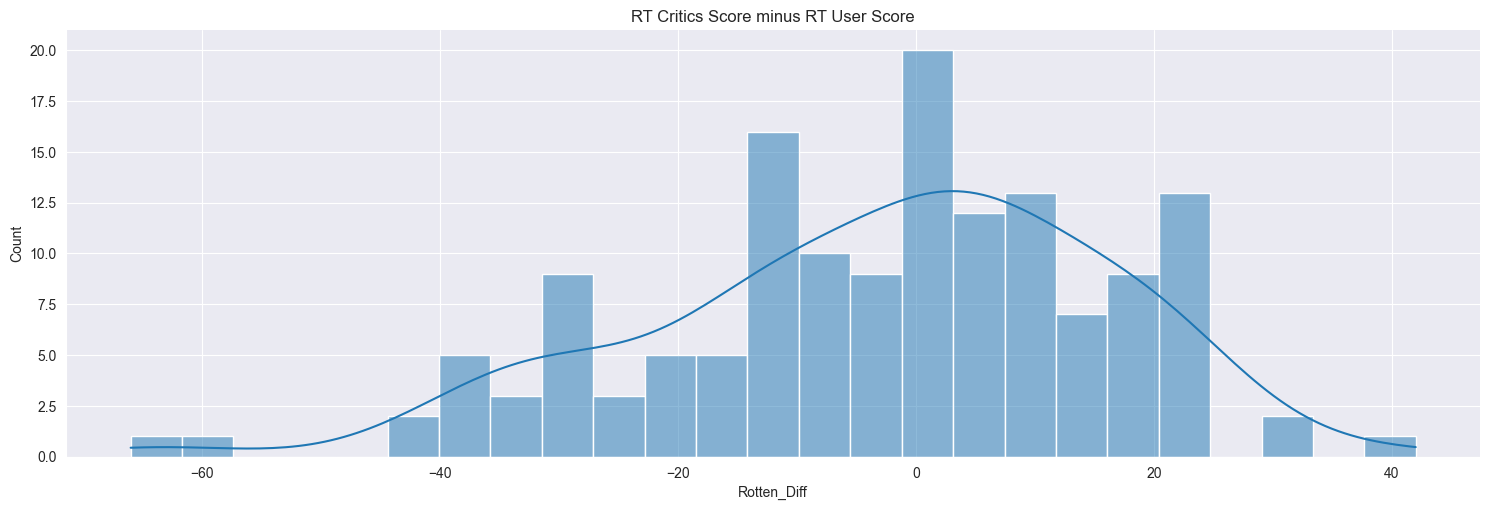

In [26]:
sns.displot(all_site_scores, x='Rotten_Diff', bins=25, kde=True, aspect=12/4)  
plt.title('RT Critics Score minus RT User Score')

In [27]:
all_site_scores_abs = all_site_scores.copy()
all_site_scores_abs['Rotten_Diff'] = all_site_scores_abs['Rotten_Diff'].abs()

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

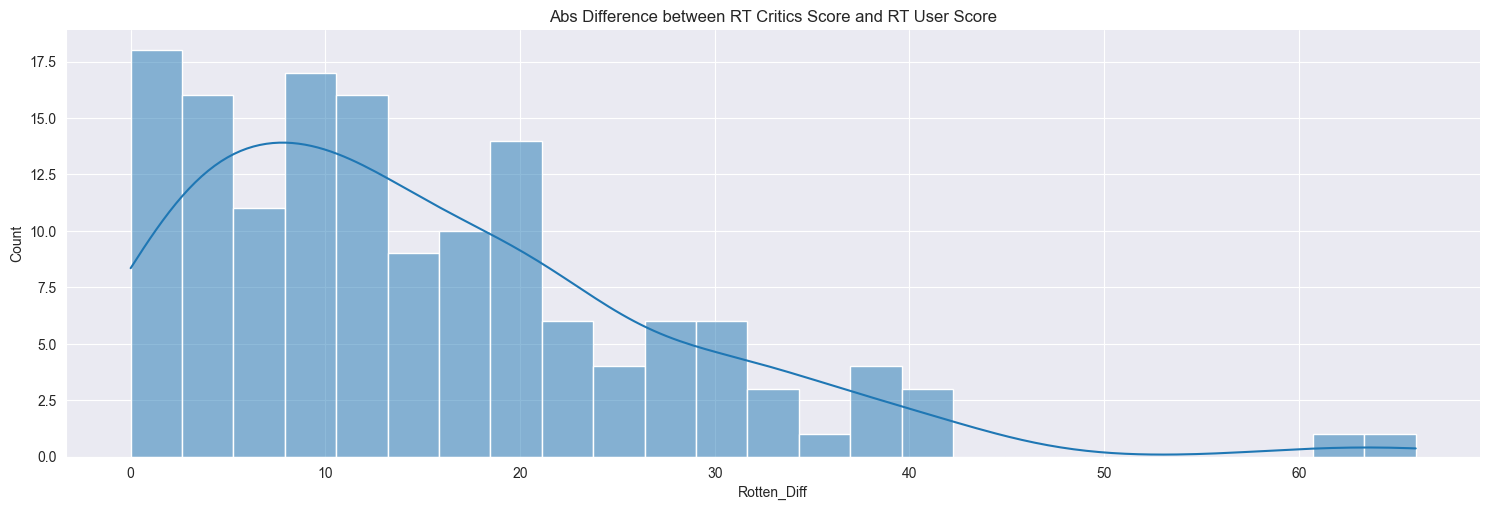

In [28]:
sns.displot(all_site_scores_abs, x='Rotten_Diff', bins=25, kde=True, aspect=12/4)  
plt.title('Abs Difference between RT Critics Score and RT User Score')

In [29]:
all_site_scores.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [30]:
all_site_scores.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


<AxesSubplot: xlabel='Metacritic', ylabel='Metacritic_User'>

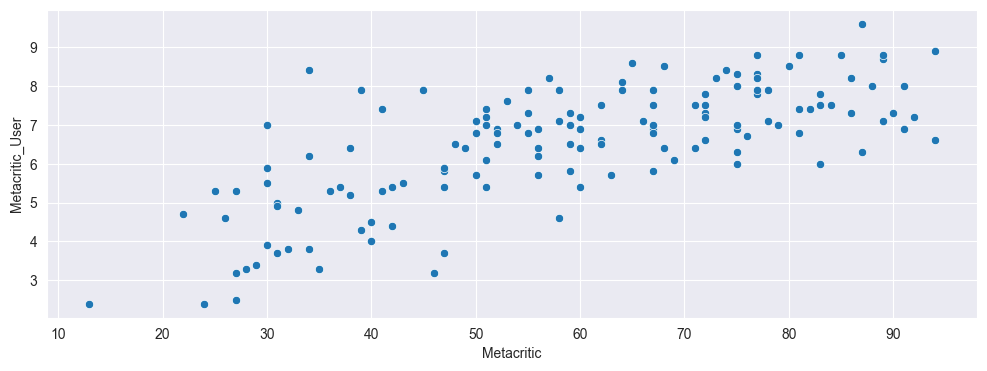

In [31]:
plt.figure(figsize=(12, 4))

sns.scatterplot(all_site_scores, x='Metacritic', y='Metacritic_User')

<AxesSubplot: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

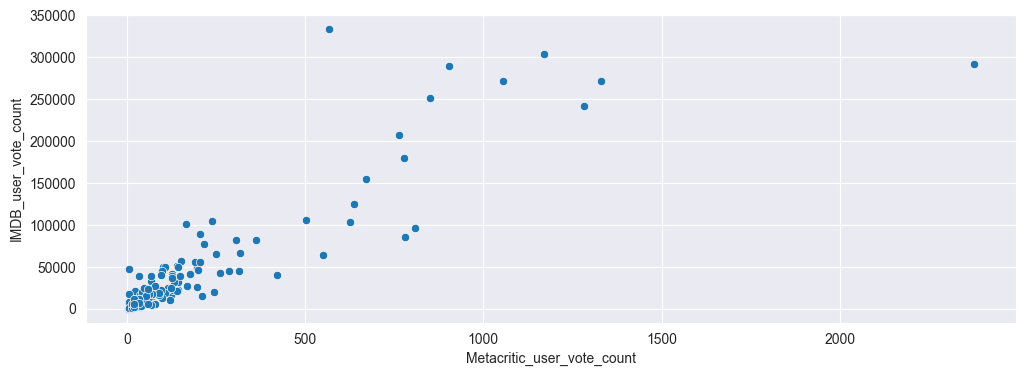

In [32]:
plt.figure(figsize=(12, 4))

sns.scatterplot(all_site_scores, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [33]:
all_site_scores.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [34]:
all_site_scores.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [35]:
combined_df = fandango_scrape.merge(all_site_scores, on='FILM', how='inner')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [36]:
combined_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [37]:
normalized_combined_df = combined_df[['STARS', 'RATING']].copy()
normalized_combined_df['RT_norm'] = np.round(combined_df['RottenTomatoes'] / 20, 1)
normalized_combined_df['RT_U_norm'] = np.round(combined_df['RottenTomatoes_User'] / 20, 1)
normalized_combined_df['Meta_norm'] = np.round(combined_df['Metacritic'] / 20, 1)
normalized_combined_df['Meta_U_norm'] = np.round(combined_df['Metacritic_User'] / 2, 1)
normalized_combined_df['IMDB_norm'] = np.round(combined_df['IMDB'] / 2, 1)

In [38]:
normalized_combined_df.head()

,STARS,RATING,RT_norm,RT_U_norm,Meta_norm,Meta_U_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


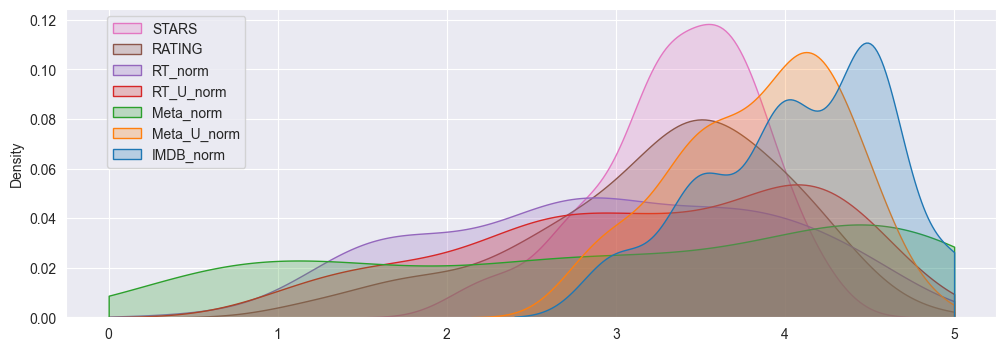

In [39]:
plt.figure(figsize=(12, 4))

sns.kdeplot(normalized_combined_df, clip=(0, 5), fill=True)

plt.legend(normalized_combined_df.columns.values.tolist(), bbox_to_anchor=(0.2, 1))

<AxesSubplot: ylabel='Density'>

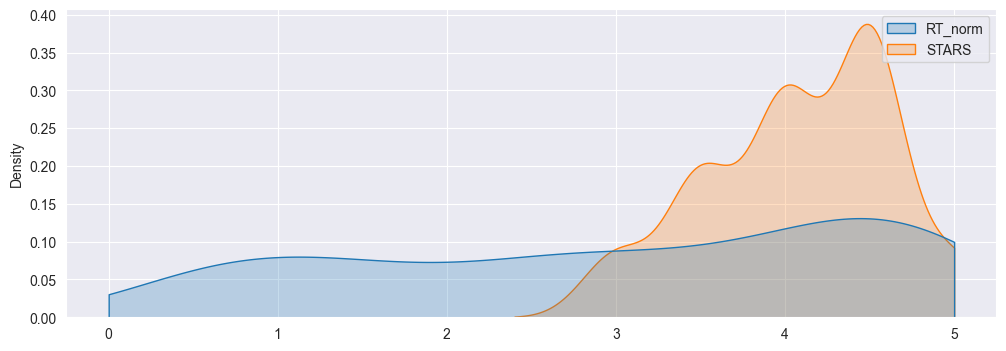

In [40]:
plt.figure(figsize=(12, 4))

sns.kdeplot(normalized_combined_df[['RT_norm', 'STARS']], clip=(0, 5), fill=True)

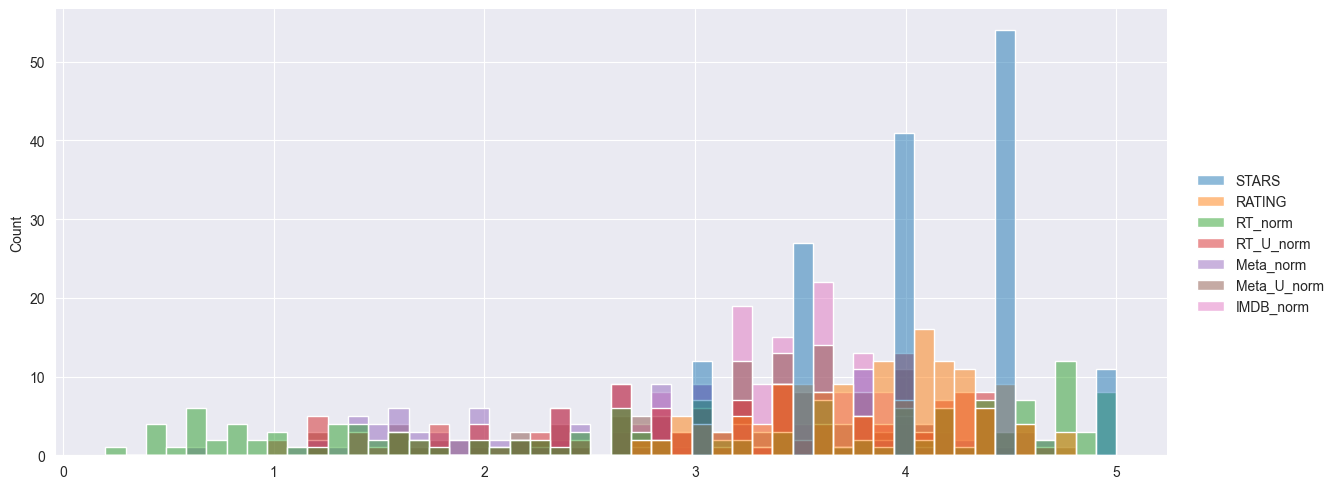

In [41]:
sns.displot(normalized_combined_df, bins=50, fill=True, aspect=12/5)

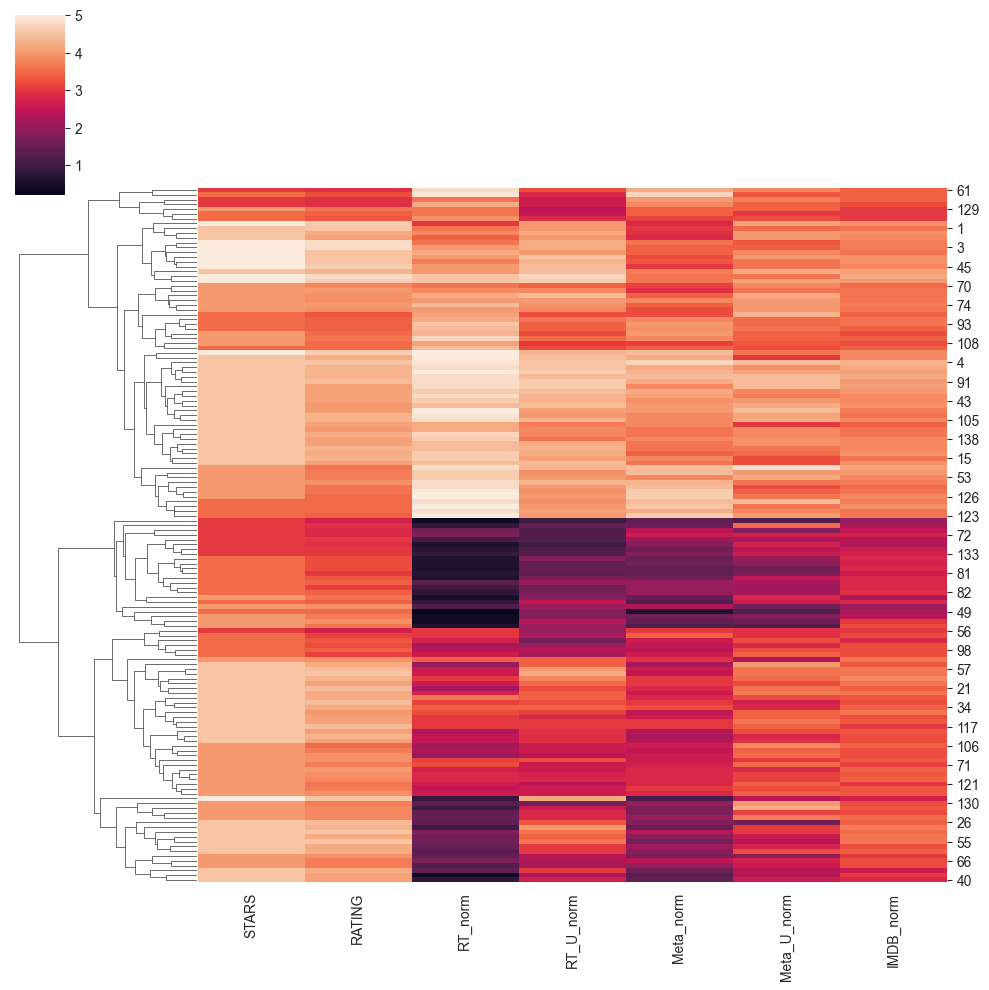

In [43]:
sns.clustermap(normalized_combined_df, col_cluster=False)

In [44]:
normalized_combined_film_df = normalized_combined_df.join(combined_df['FILM'])
normalized_combined_film_df

,STARS,RATING,RT_norm,RT_U_norm,Meta_norm,Meta_U_norm,IMDB_norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5,The Diary of a Teenage Girl (2015)
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9,The Wrecking Crew (2015)
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7,Tangerine (2015)


In [45]:
normalized_combined_film_top_df = normalized_combined_film_df.nsmallest(10, 'RT_norm')
normalized_combined_film_top_df

,STARS,RATING,RT_norm,RT_U_norm,Meta_norm,Meta_U_norm,IMDB_norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

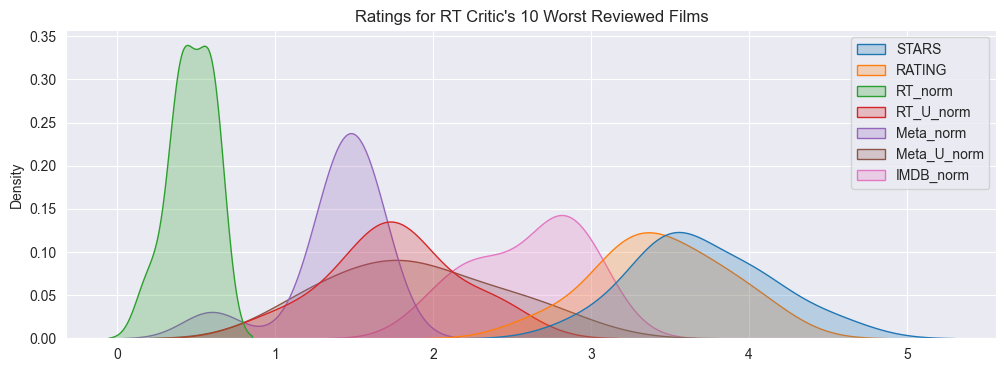

In [48]:
plt.figure(figsize=(12, 4))

sns.kdeplot(normalized_combined_film_top_df, fill=True)

plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")